# Gauss Hermite Normalisations

Whilst hacking PPXF to free the parameters $(h_0, h_1, h2)$, one issue that arose is the LOSVD normalisation. Freeing these parameters, the normalisation of the LOSVD becomes highly unconstrained, introducing an artifical degeneracy is between the LOSVD and normalisations of SSP weights. This degenracy is artificial as we should be able to control one of the distribtuions to be normalised as a probability distribution, whilst the other can have physical units. A fix to this problem is to do the following

1. whilst fitting, fix $h_0=1$ whilst leaving free $h_1, h2, ...$
    * this "pins down" the LOSVD normalisation, removing the artificial degeneracy with the SSP weights
    * whilst "pinned down", this normalisation is still not necessarily correct - i.e. a probability distribution - necessating the next step
2. post-facto renormalising of the LOSVD and SSP weights
    * after performing the fit, calculate the normalisation $\gamma = \int L(v) \; \mathrm{d}v$ and then renormlise...

$$
h_i \rightarrow \frac{h_i}{\gamma} \;\; \mathrm{for} \;\; i=0, 1, 2,...
$$

$$
w_\mathrm{SSP} \rightarrow \gamma w_\mathrm{SSP}
$$

In the next sections I will:
1. calculate the normalisation 
2. show that a different convention for Hermite polynomials would have led to a much simpler expression for the normalisation

## The PPXF GH-LOSVD normalisation

The PPXF definition of a GH LOSVD (inherited from vd Marel & Franx '92) is given by 

$$
L(v) = \frac{1}{\sigma} \mathcal{N}(\hat{v};0,1^2) \left[\sum_{m=0}^{M} h_m H_m(\hat{v})\right]
$$

$$
\hat{v} = \frac{v - V}{\sigma}
$$

where $H_m(x)$ are scaled physicists Hermite polynomials as defined (e.g.) in equation 16 of Capellari '16. We want to calculate the normalisation factor

\begin{align*}
\gamma &= \int_{-\infty}^{\infty} L(v) \; \mathrm{d}v \\
       &= \int_{-\infty}^{\infty} \mathcal{N}(\hat{v};0,1^2)
           \left[\sum_{m=0}^{M} h_m H_m(\hat{v})\right] \mathrm{d}\hat{v} \\
       &= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty}
           \exp\left(-\frac{\hat{v}^2}{2}\right)
           \left[\sum_{m=0}^{M} a_m \hat{v}^m \right]
           \mathrm{d}\hat{v} \\
       &= \sum_{m=0}^{M} b_m a_m
\end{align*}

where

$$
b_m = \begin{cases}
    1 &\mbox{if } m = 0, \\
    0 &\mbox{if } m \mbox{ is odd}, \\
    (m-1) !! &\mbox{if } m \mbox{ is non-zero and even}.
\end{cases}
$$

To do the above calculation I took the following steps:
1. transform from $v$ to $\hat{v}$ and insert the GH-expansion of the LOSVD
2. insert definitions of standard normal pdf and collect together all the Hermite polynomials of various order into a single polynomial with coefficientss $a_m$
3. use [standard results](https://en.wikipedia.org/wiki/Gaussian_integral#Integrals_of_similar_form) for inetgrals of this form
    * only even terms contribute due to symmetry
    * the $!!$ refers to a [double factorial](https://en.wikipedia.org/wiki/Double_factorial) which does **not** mean two factorials, but means the product of all intergers up to $n$ with the same parity as *n*
    
Let's code this up and test this:

In [1]:
# some magic to be able to import local module into jupyter notebook
# https://mg.readthedocs.io/importing-local-python-modules-from-jupyter-notebooks/index.html
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from dynamite_src import gauss_hermite_kinematics as ghk
import numpy as np
import matplotlib.pyplot as plt

Normalisations:
...  numerical: 4.447607574086024
...  analytic: 4.447607574085207


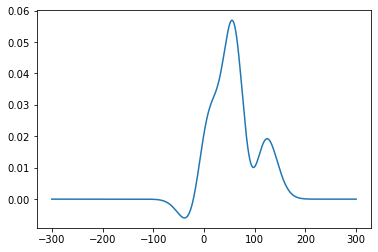

In [2]:
v_mu = 50.
v_sig = 30.
h = np.array([4, -0.1, 0.2, 0.3, 0.5, 1])

# re-format input to expected dimensions
v_mu = np.atleast_1d(v_mu)
v_sig = np.atleast_1d(v_sig)
h = h[np.newaxis, np.newaxis, :] 

# evaluate LOSVD
varr = np.linspace(-300, 300, 10000)
dv = varr[1] - varr[0]
gauherm = ghk.GaussHermite()
losvd = gauherm.evaluate_losvd(varr, v_mu, v_sig, h)
plt.plot(varr, np.squeeze(losvd))

# evaluate LOSVD normalisation...
norm1 = np.sum(losvd * dv) # ... numerically
norm2 = gauherm.evaluate_losvd_normalisation(h) # ... analytically

print('Normalisations:')
print('...  numerical:', norm1)
print('...  analytic:', np.squeeze(norm2))

## The probabilist's choice

The expression derived above for the LOSVD normalisaton is true for the PPXF definition of the Gauss Hermite expansion, however an alternative definition using probabilists' (rather than physicists') Hermite polynomials would give the simpler exression

$$
\gamma = h_0
$$

To see this, note that the physicists' Hermite polynomials $H_m(x)$ are orthogonal with respect to the weight function $\exp(-x^2)$, i.e.

$$
\int_{-\infty}^{\infty} \exp(-x^2) H_m(x) H_n(x) \; \mathrm{d}x \propto \delta_{mn}
$$

whilst for the probabilists' polynomials $He_m(x)$ the appropriate weight function is 

$$\exp\left(-\frac{x^2}{2}\right)$$ 

i.e. the exponential part of the standard normal pdf. At first it seems counter-intuitive, then, that the vdMarel+Franx choice for the Gauss-Hermite expansion was for a standard normal weight function with *physicists'* polynomials. Has they chosen the probabilists' versions, the normalisation would have been 

\begin{align*}
\gamma &= \int_{-\infty}^{\infty} L(v) \; \mathrm{d}v \\
       &= \int_{-\infty}^{\infty} \mathcal{N}(\hat{v};0,1^2)
           \left[\sum_{m=0}^{M} h_m He_m(\hat{v})\right] \mathrm{d}\hat{v} \\
       &= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \exp\left(-\frac{x^2}{2}\right)
           \left[\sum_{m=0}^{M} h_m He_m(\hat{v}) He_0(\hat{v})\right] \mathrm{d}\hat{v} \\
       &= \frac{1}{\sqrt{2\pi}} h_0
          \int_{-\infty}^{\infty} \exp\left(-\frac{x^2}{2}\right)
          He_0(\hat{v}) He_0(\hat{v}) \mathrm{d}\hat{v} \\
        &= h_0
\end{align*}

where we have used the fact that  

$$
He_0(x) = 1
$$

and the orthogonality of $He_m$ under this weight function.

Why did vdMarel+Franx choose this seemingly counter-intuitively option? I think both options have equally simple expressions for

1. $h_m$ given an observed (histogrammed) LOSVD
2. Fourier transform
3. deviations from the base Gaussian

so it's not immediately obvious to me. In any case, being able to control the LOSVD normalisation in the fit could be useful, and probabilists' Hermite polynomials offer a simple way to do this. Maybe we should dive-in and make this change whilst we're anyway changing the $(h_0, h_1, h_2)$ defaults.